# Imports

In [1]:
from run_single import run_single, graph_types
from slurm_main import slurm_main, all_types
from visualization import time_histograms, recover_data, fits, plot_one_fit, simB, comp_m, comp_mat, plot_phi_th

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Variables

# Theoretical plots

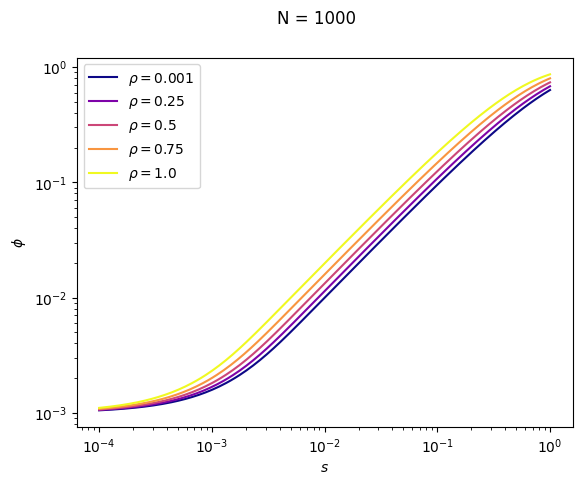

In [2]:
plot_phi_th(1000, 4, -4, 0)

# WM

In [3]:
prefix = 'wm_paper'
results_dir = 'results/wm/'

num = 20
nb_M_values = 5



type = 'wm_sim'
N = 100
M_range = [1] + [i*N//(nb_M_values-1) for i in range(1,nb_M_values)]
log_s_min = -3
log_s_max = -1
#nb_trajectories = 1000  #1k_runs
#nb_trajectories = 10000  #10k_runs
nb_trajectories = 1000000  #1M_runs




In [4]:
run = True

if run:
    for job_array_nb, M in enumerate(M_range):
        slurm_main(prefix, results_dir, num, type, job_array_nb, N, M, log_s_min, log_s_max, nb_trajectories)

Execution time: 87.40277218818665
Execution time: 20.877463340759277
Execution time: 23.863551378250122
Execution time: 30.512070178985596
Execution time: 36.425966024398804


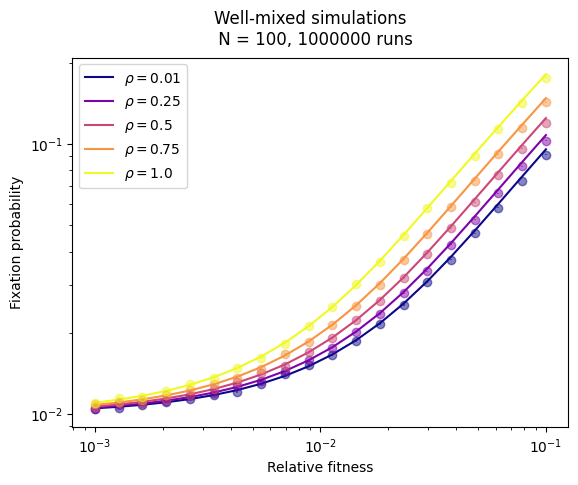

In [5]:
from visualization import WM_paper

WM_paper(prefix, 0, len(M_range)-1, results_dir)

# Time histograms

In [6]:
prefix = ''
results_dir = 'results/histograms/'

#type = 'line'

job_array_nb = 2

N = 100
M = 50
s = 0.001

nb_trajectories = 1000000 #1M runs

migration_rate = 0.001
nb_demes = 3

alpha = 1
initial_node = 1




In [7]:
run = False
if run:
    for type in graph_types:
        run_single(prefix, results_dir, type, job_array_nb, N,M,s, nb_trajectories, migration_rate, nb_demes, alpha, initial_node)

In [8]:
run=False

if run:
    for type in graph_types:
        time_histograms(results_dir, prefix, type, job_array_nb)

In [9]:
N_wm = N * nb_demes
M_wm = M * nb_demes



In [10]:
run = False

if run:
    run_single(prefix, results_dir, 'wm_sim', job_array_nb, N_wm,M_wm,s, nb_trajectories, migration_rate)

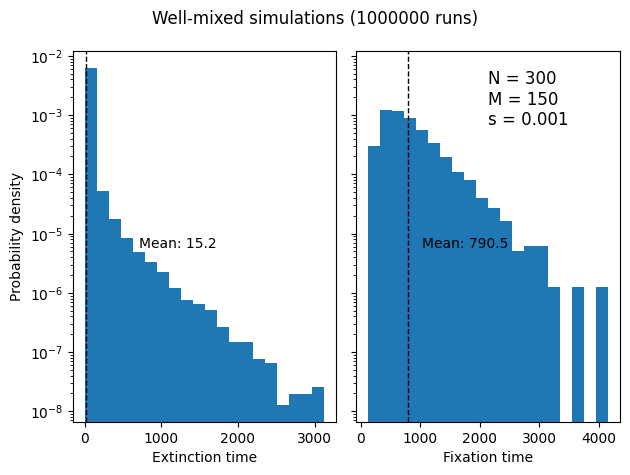

In [11]:
run=True
if run:
    time_histograms(results_dir, prefix, 'wm_sim', job_array_nb)

# Comparing structures

In [12]:
results_dir = 'results/comp_str/'
prefix = 'comp_str'
num = 20
job_array_nb = 3
N = 50
M = N//2
nb_demes = 5
N_wm = N * nb_demes
M_wm = N_wm // 2
log_s_min = -3
log_s_max = 0
nb_trajectories = 100000 #100k runs
migration_rate = 0.01
alpha = 2



In [13]:
run = False

if run:
    for type in ['wm_sim', 'clique', 'cycle','star','line']:
        if type in ['wm_sim', 'wm_mat']:
            slurm_main(prefix, results_dir, num, type, job_array_nb, N_wm, M_wm, log_s_min, log_s_max,nb_trajectories)
        elif type in ['line', 'star']:
            initial_node = 'avg'
            slurm_main(prefix, results_dir, num, type, job_array_nb, N, M, log_s_min, log_s_max, nb_trajectories, migration_rate, nb_demes, alpha, initial_node)
        else:
            slurm_main(prefix, results_dir, num, type, job_array_nb, N, M, log_s_min, log_s_max, nb_trajectories, migration_rate, nb_demes, alpha)

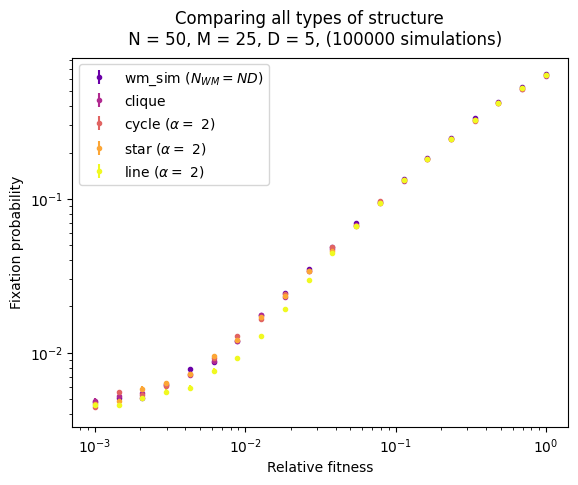

In [14]:
run = True
if run:
    simB(prefix, job_array_nb, results_dir)

# Comparing migration rates

## Clique

In [15]:
results_dir = 'results/comp_m/'
num = 20
job_array_nb = 3

type = 'clique'
N = 50
M = N//2
nb_demes = 3

N_wm = N * nb_demes
M_wm = N_wm // 2

log_s_min = -4
log_s_max = -1

nb_trajectories = 100000 #100k runs
#nb_trajectories = 10000 #10k runs

nb_migration_rate_values = 5
migration_rate_range = np.logspace(start= 10, stop=1, base= 1./nb_demes, num= nb_migration_rate_values)


In [16]:
run = False

if run:
    for i,migration_rate in enumerate(migration_rate_range):
        prefix = str(i)
        slurm_main(prefix, results_dir, num, type, job_array_nb, N, M, log_s_min, log_s_max, nb_trajectories, migration_rate, nb_demes)

In [17]:
run = False

if run:
    prefix = 'wm'
    slurm_main(prefix, results_dir, num, 'wm_sim', job_array_nb, N_wm, M_wm, log_s_min, log_s_max, nb_trajectories)

In [18]:
run = False


if run:
    comp_m(job_array_nb, type, migration_rate_range, results_dir)





# Using matrices inversion to compute fixation probability

In [19]:
results_dir = 'results/comp_mat/'
num = 20
job_array_nb = 4
prefix = 'comp_mat'


N = 200
M = N//2


log_s_min = -4
log_s_max = 0

nb_trajectories = 100000 #100k runs
#nb_trajectories = 10000 #10k runs



In [20]:
run = False

if run:
    slurm_main(prefix, results_dir, num, 'wm_sim', job_array_nb, N, M, log_s_min, log_s_max, nb_trajectories)
    slurm_main(prefix, results_dir, num, 'wm_mat', job_array_nb, N, M, log_s_min, log_s_max)

In [21]:
run = False

if run:
    comp_mat(prefix, results_dir, job_array_nb)

# Estimating the effective population size as a function of M

Fitting $\gamma$ with the model:
$$
\phi (s) = \frac{1 - \exp (-\gamma s)}{1 - \exp (-\gamma N D s)}
$$

In [22]:
results_dir = 'results/fit_10k/'
num = 10
nb_M_values = 5
nb_migration_rate_values = 3
gammas = np.zeros((nb_M_values, nb_migration_rate_values))




type = 'clique'
N = 100
M_range = [1] + [i*N//(nb_M_values-1) for i in range(1,nb_M_values)]
log_s_min = -5
log_s_max = -2
#nb_trajectories = 1000  #1k_runs
nb_trajectories = 10000  #10k_runs
#nb_trajectories = 100000  #100k_runs
nb_demes = 5
migration_rate_range = np.logspace(start=1, stop=3, base= 1/nb_demes, num= nb_migration_rate_values)



In [23]:
run=False

if run:
    for i,M in enumerate(M_range):
        prefix = f'{i}'
        for j, migration_rate in enumerate(migration_rate_range):
            job_array_nb = j
            slurm_main(prefix, results_dir, num, type, job_array_nb, N, M, log_s_min, log_s_max, nb_trajectories, migration_rate, nb_demes)
        

In [24]:
run=False
job_array_nb_wm = 0
N_wm = nb_demes * N
M_range_wm = [1] + [i*N_wm//(nb_M_values-1) for i in range(1,nb_M_values)]

nb_trajectories_wm = 10000  #10k runs

if run:
    for i,M_wm in enumerate(M_range_wm):
        wm_prefix = 'wm_' + f'{i}'
        slurm_main(wm_prefix, results_dir, num, 'wm_sim', job_array_nb_wm, N_wm, M_wm, log_s_min, log_s_max, nb_trajectories_wm)

In [25]:
run=False

gammas, wm_gammas = fits(results_dir, M_range, migration_rate_range,type)


KeyError: 'nb_fixations'

KeyError: 'nb_fixations'

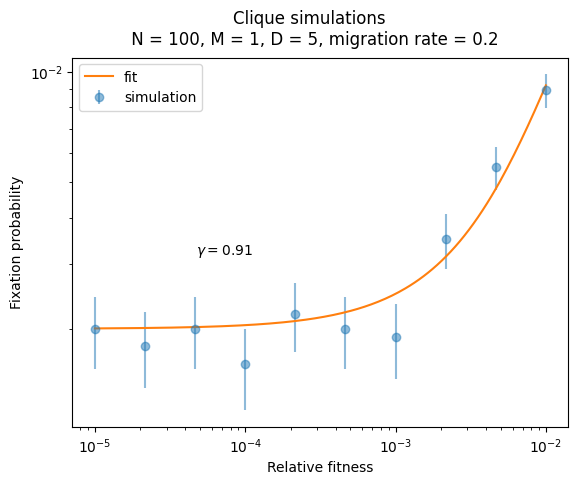

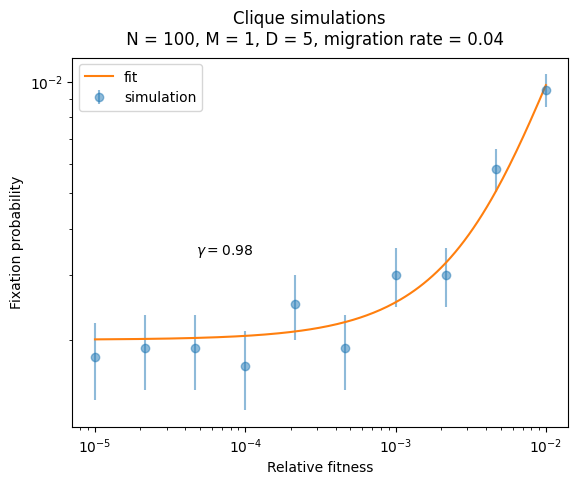

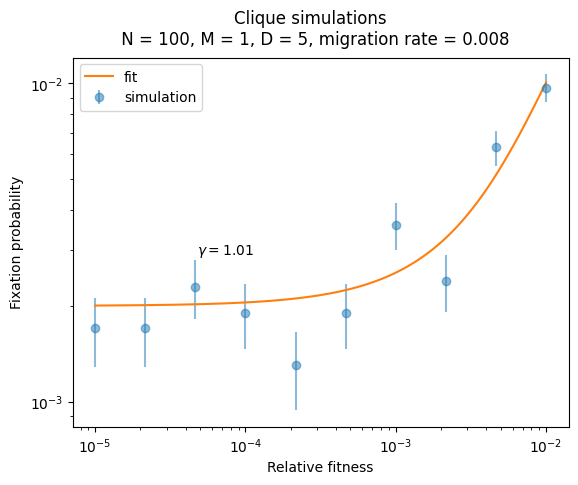

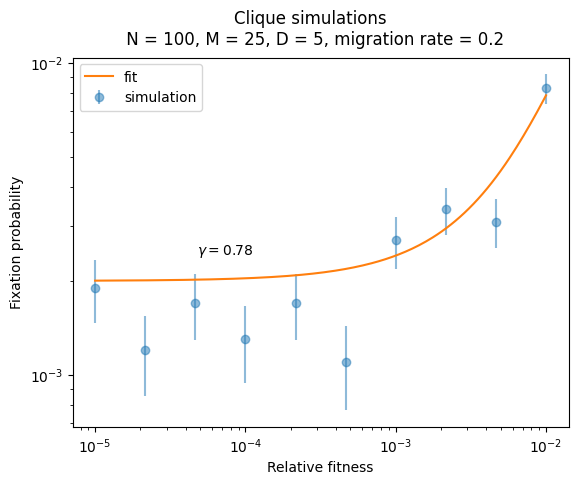

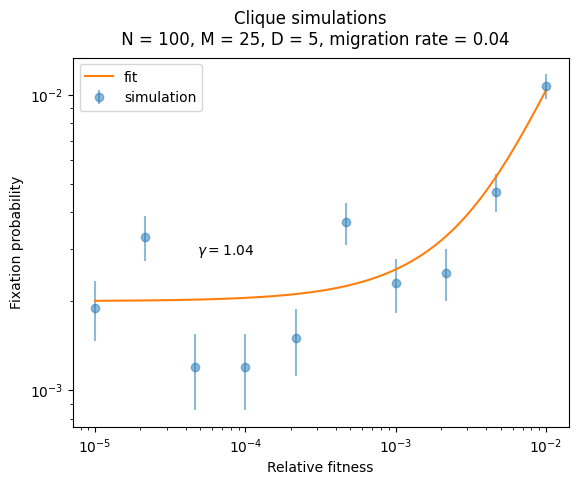

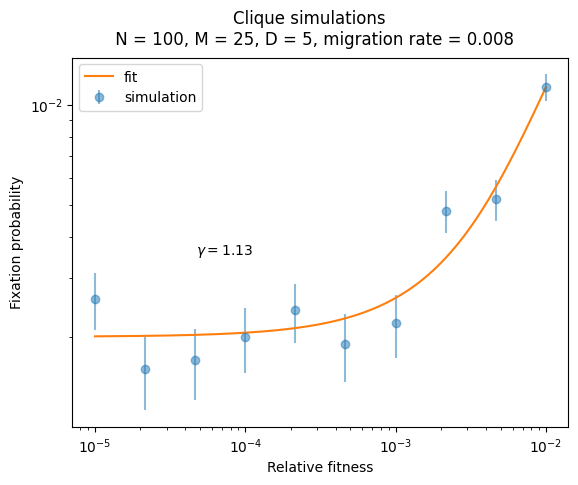

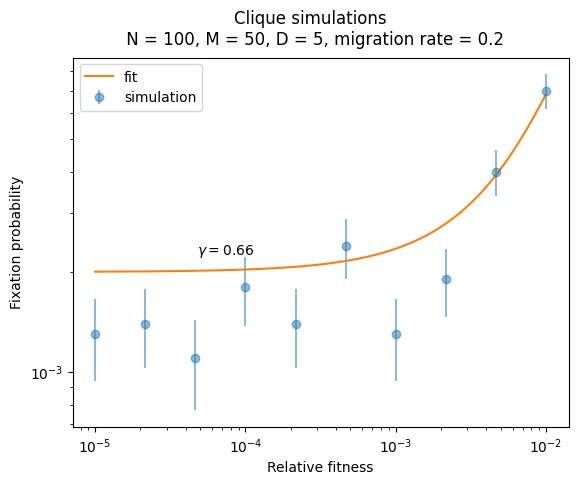

In [ ]:
run=False
plot_all = True
if run:
    for M_index,_ in enumerate(M_range):
        for job_array_nb,migration_rate in enumerate(migration_rate_range):
            if plot_all:
                plot_one_fit(M_index,M_range, migration_rate_range, type, results_dir,job_array_nb, gammas)
    if not plot_all:
        M_index = np.random.randint(0, nb_M_values)
        job_array_nb = np.random.randint(0, nb_migration_rate_values)
        plot_one_fit(M_index,M_range, migration_rate_range, type, results_dir,job_array_nb, gammas)
    


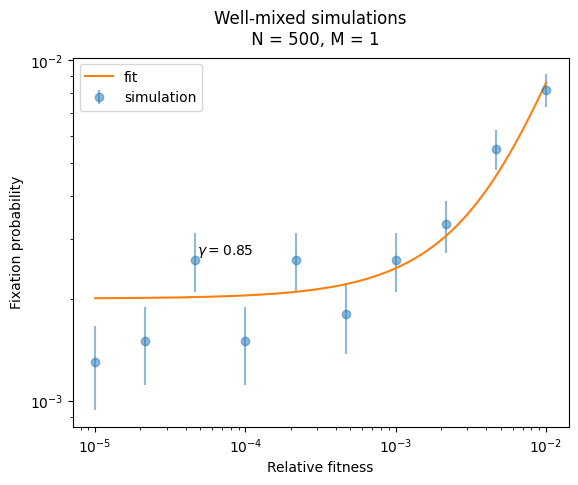

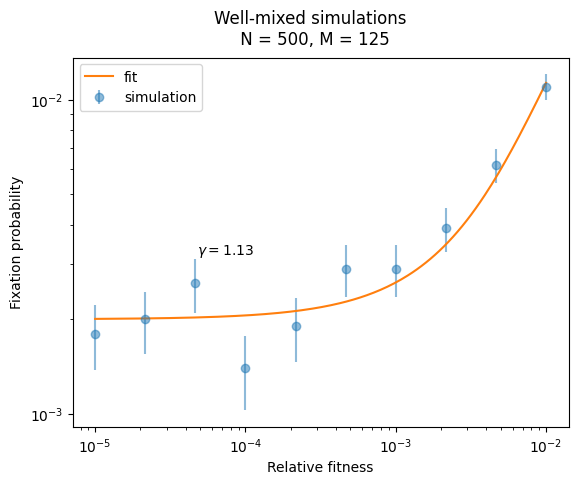

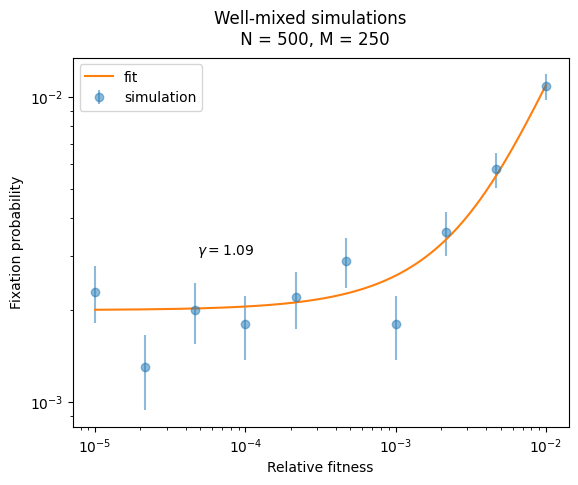

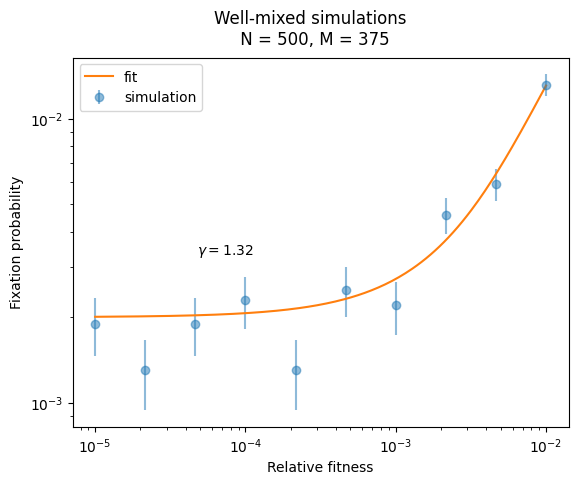

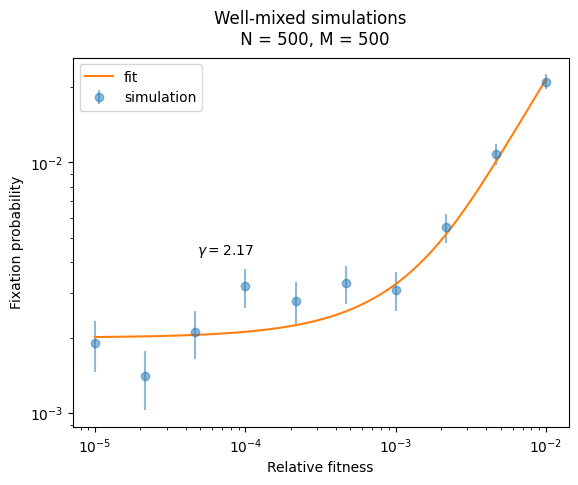

In [13]:
run= True

if run:
    for M_index,_ in enumerate(M_range_wm):
        job_array_nb_wm = 0
        plot_one_fit(M_index, M_range_wm,migration_rate_range, 'wm_sim',results_dir, job_array_nb_wm, wm_gammas )